# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-1**<br>
**Profesora:** Paula Aguirre <br>

## Clase 17: Análisis Exploratorio Multivariado.

---

## Caso de Estudio: Análisis de Votaciones Presidenciales en EEUU 2020.


### Descripción del Dataset.

Los datos para este problema correspoden a los resultados de las elecciones presidenciales 2020 de EEUU (Biden vs. Trump), a nivel de condados. Además, se incluyen algunas variables sociodemográficos y resultados de elecciones anteriores.

Estos datos pueden ser visualizados en el siguiente mapa de USA Today:

https://www.usatoday.com/in-depth/graphics/2020/11/10/election-maps-2020-america-county-results-more-voters/6226197002/


### Objetivo.

Analizar el comportamiento de distintos estados y condados en las elecciones presidenciales estadounidenses 2020. Por ejemplo, algunas preguntas que podríamos responder a partir de los datos son:

- ¿Cómo se distribuyen los condados donde ganó la opción demócrata (Biden) o republicana (Trump)?
- ¿En qué se parecen/diferencian?
- ¿Hay correlaciones entre el porcentaje de voto demócrata (o republicano) y otras variables políticas o sociodemográficas?
- ¿Es el comportamiento de un condado o estado, predictor de otro?
- ¿Hay similitudes entre los swing states?



In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

### Lectura de Datos.

La librería Pandas implemente métodos de lectura de distintos tipos de datos, entre ellos datos en formato `csv`, mediante la función `read_csv`:

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


In [3]:
dat=pd.read_csv('county_election_results.csv')

#caculamos el porcentaje de votos D y R en cada condado, para identificar más fácilmente quién ganó en cada uno
dat['pct_D']=dat['votes_D_2020']/dat['votes_total_2020']*100
dat['pct_R']=dat['votes_R_2020']/dat['votes_total_2020']*100

In [4]:
dat.columns

Index(['Unnamed: 0', 'FIPS', 'eevp', 'electTotal', 'electionDate', 'level',
       'office', 'state', 'winner', 'votes_R_2020', 'votes_D_2020',
       'votes_third_party_2020', 'votes_total_2020', 'export_time',
       'acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income', 'category_education', 'category_income',
       'category_nonwhite', 'category_jobs_management',
       'category_jobs_service', 'pew_classification', 'region',
       'category_unemployment', 'date', 'POPESTIMATE2019', 'deaths',
       'deaths_per_thousand', 'deaths_percap_pctile', 'cases',
       'cases_per_thousand', 'cases_percap_pctile', 'case_pct_change',
       'BLS_Area_Code', 'Month', 'Month_Str', 'Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate', 'county', 'pct_2000_dem',
       'pct_2000_gre', 'pct_2000_rep', 'pct_2004_dem', 'pct_2004_rep',
       'pct_2008_dem', 'pct_2008_rep', 'pct_

In [5]:
columns=['pct_D','pct_R','acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income','POPESTIMATE2019','state','county','Unemployment Rate','winner','region']
dat2=dat[columns]

#### Chequeo rápido: ¿a qué corresponde exactamente la variable `winner`?

<AxesSubplot:xlabel='pct_D', ylabel='Count'>

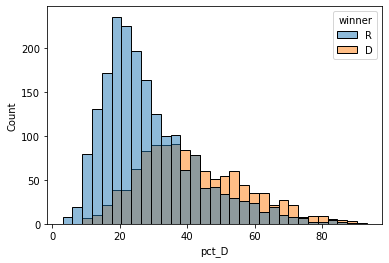

In [6]:
sns.histplot(data=dat2,x='pct_D',hue='winner')

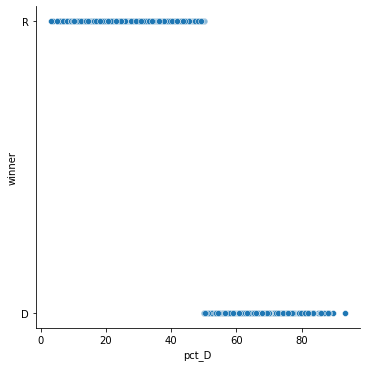

In [8]:
sns.relplot(data=dat2,x='pct_D',y='winner')

<ipython-input-7-51d74daa7061>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat2['winner']=['D' if x>=50.0 else 'R' for x in dat2['pct_D']]


<AxesSubplot:xlabel='pct_D', ylabel='Count'>

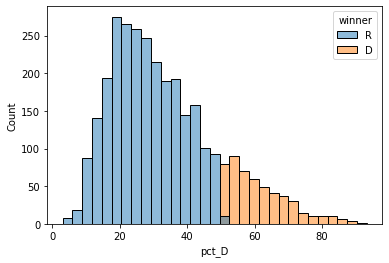

In [7]:
dat2['winner']=['D' if x>=50.0 else 'R' for x in dat2['pct_D']]
sns.histplot(data=dat2,x='pct_D',hue='winner')
#sns.relplot(data=dat2,x='pct_D',y='winner')

## Análisis Exploratorio Multivariado.

¿Cómo se comportan las distintas variables políticas y socioeconómicas por región, estado, o según el partido ganador? ¿Podemos sacar alguna conclusión a partir de distintos análisis gráficos?


### Boxplot multivariado.

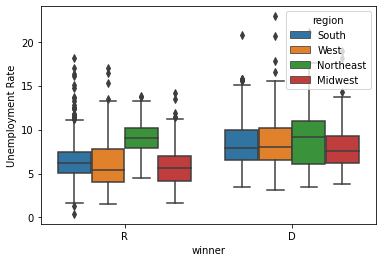

In [9]:
sns.boxplot(data=dat2,y='Unemployment Rate',x='winner',hue='region');

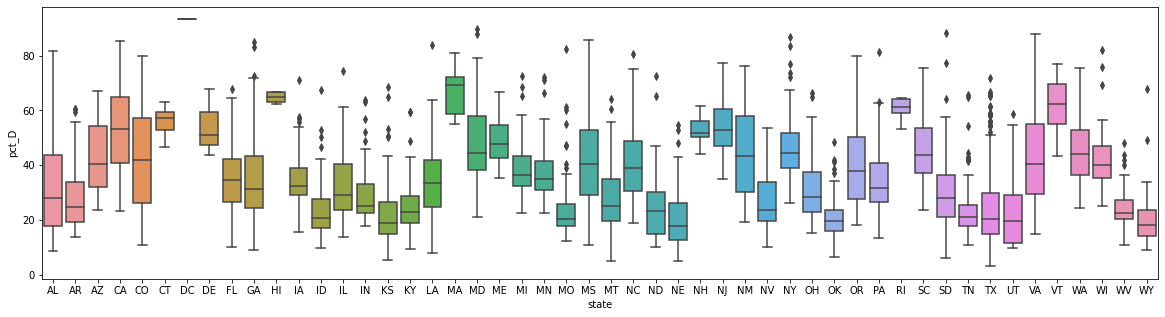

In [13]:
fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
sns.boxplot(ax=ax,data=dat2,y='pct_D',x='state',width=0.8);

In [10]:
#analicemos ahora los coeficientes de correlación para un subconjunto de condados: los que están en swing states
swing=['GA','PA','AZ','MI','WI',]
dats=dat2[dat['state'].isin(swing)]

In [14]:
dats=dat2[dat['state'].isin(swing)]
dat2.head()

<ipython-input-14-03eeb8f1ce79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat2['winner']=['D' if x >=50.0 else 'R' for x in dat2['pct_D']]


,pct_D,pct_R,acs_pct_pop_nonwhite,acs_pct_management,acs_pct_service,pct_pop25+_bachelor_higher,median_household_income,per_capita_income,POPESTIMATE2019,state,county,Unemployment Rate,winner,region
0,12.726402,86.555493,16.065834,25.1,16.0,11.1,38142.0,20471.0,26271,AL,Geneva,3.9,R,South
1,15.937970,83.424096,19.861143,24.3,13.3,14.2,45182.0,24611.0,44428,AL,Chilton,4.7,R,South
2,14.611919,84.534781,19.324438,23.2,15.8,12.7,39233.0,21004.0,71513,AL,DeKalb,3.8,R,South
3,10.614525,88.551114,8.029368,26.0,14.2,13.1,35392.0,21391.0,29709,AL,Marion,4.2,R,South
4,16.597708,82.558880,22.918648,23.7,13.9,12.9,40459.0,19776.0,31362,AL,Franklin,3.6,R,South


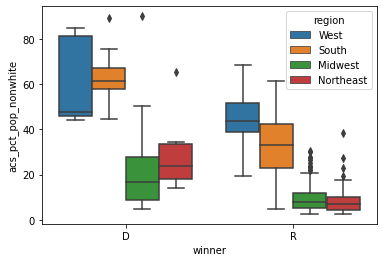

In [15]:
sns.boxplot(data=dats,y='acs_pct_pop_nonwhite',x='winner',hue='region');

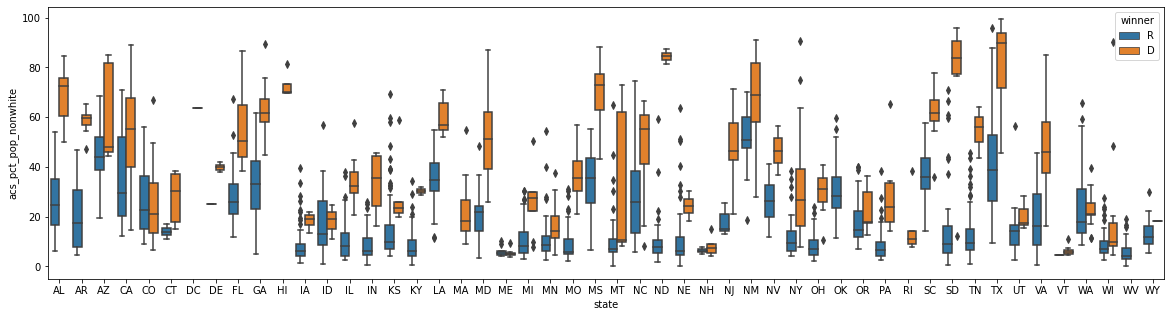

In [16]:
fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
sns.boxplot(data=dat2,y='acs_pct_pop_nonwhite',x='state',hue='winner');

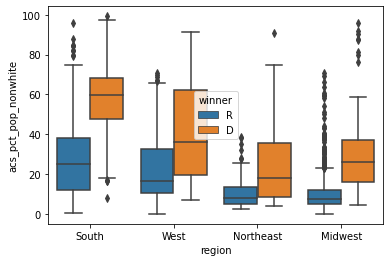

In [17]:
sns.boxplot(data=dat2,y='acs_pct_pop_nonwhite',x='region',hue='winner');

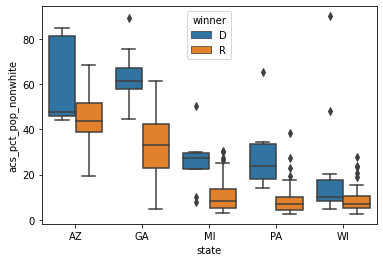

In [18]:
sns.boxplot(data=dats,y='acs_pct_pop_nonwhite',x='state',hue='winner');

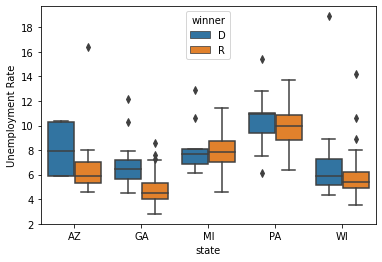

In [19]:
sns.boxplot(data=dats,y='Unemployment Rate',x='state',hue='winner');

Para los swing states, se aprecia una tendencia entre el ganador del condado, y el porcentaje de población no-blanca: en general este porcentaje tiene una distribución de valores más altos en los condados donde ganan los demócratas. 

### Gráficos de dispersión.

Podemos visualizar en más detalle la relación entre estas (y otras variables) usando gráficos de dispersión.

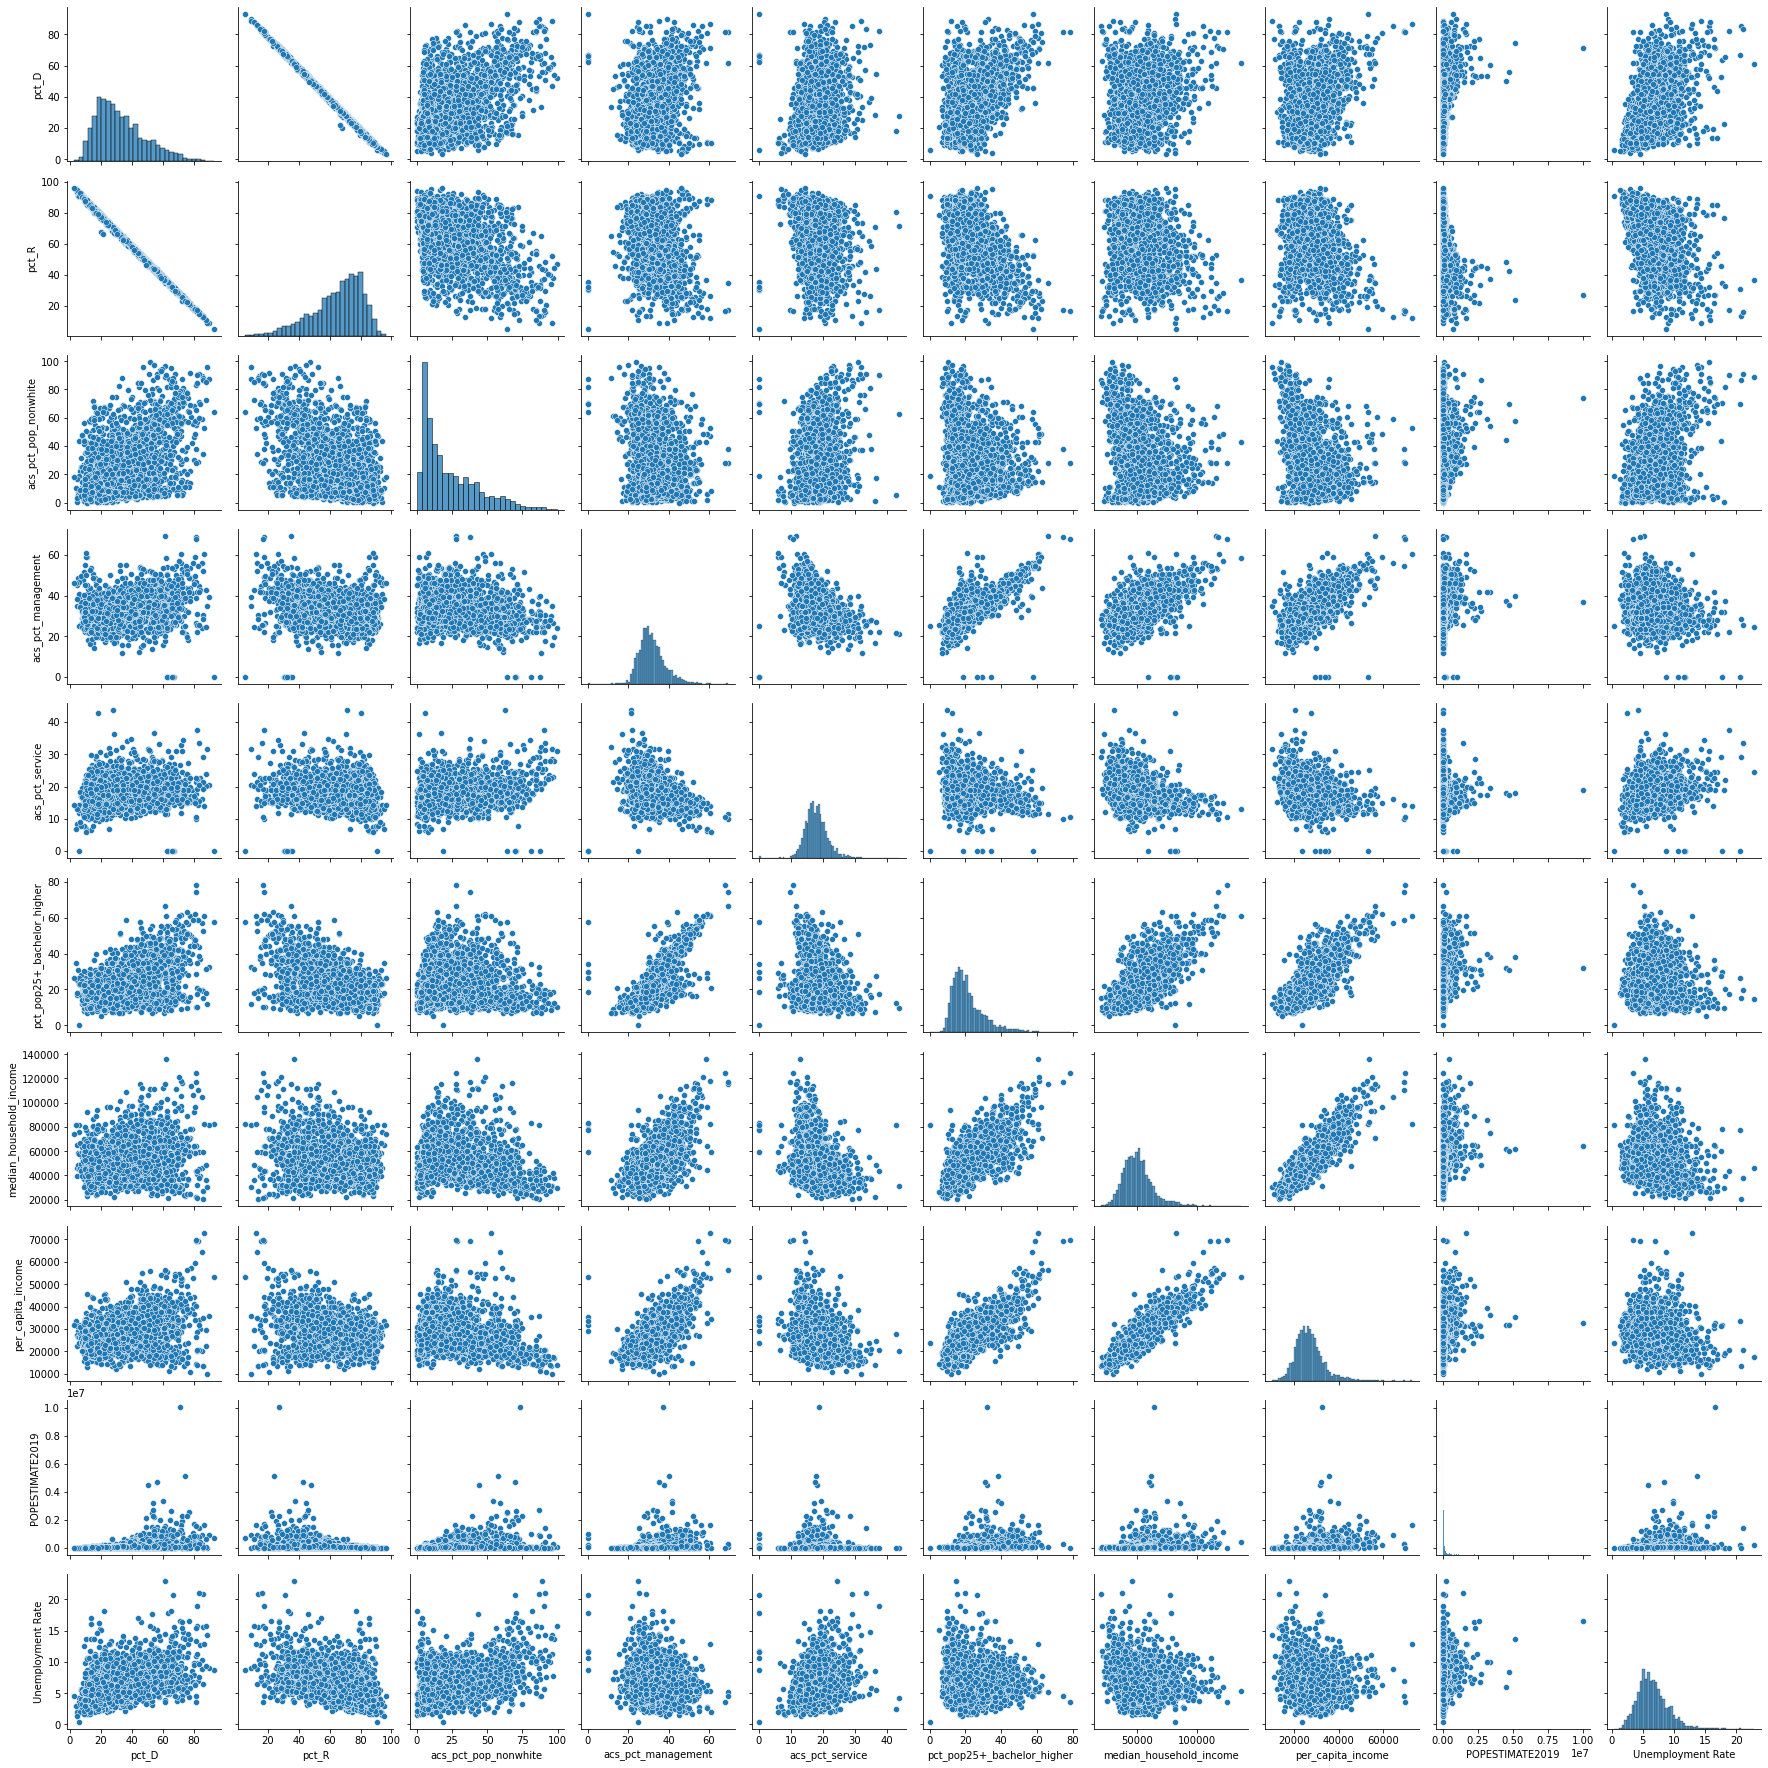

In [20]:
sns.pairplot(dat2)

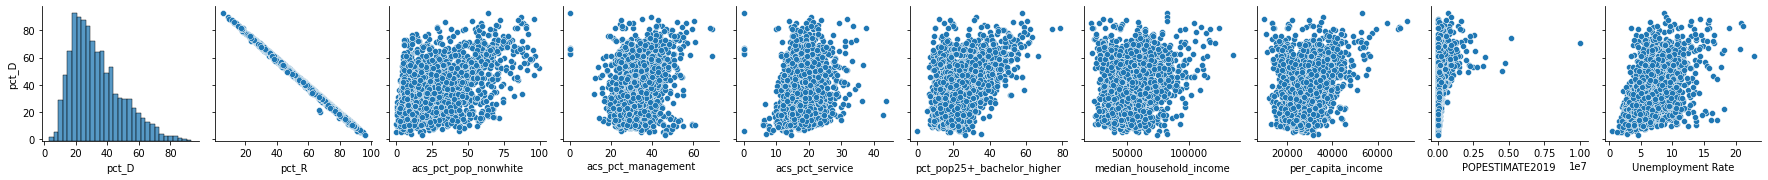

In [21]:
sns.pairplot(dat2,y_vars='pct_D')

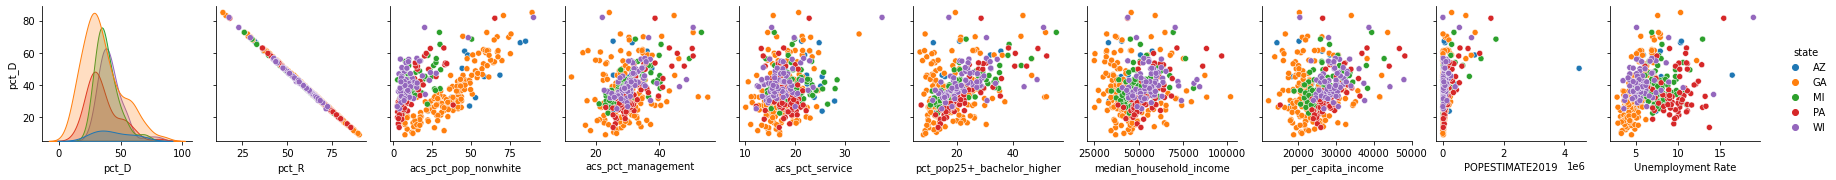

In [22]:
sns.pairplot(dats,y_vars=['pct_D'],hue='state');

### Coeficientes de correlación.

In [9]:
#para calcular los coeficientes de correlación entre todas las variables, es más eficiente usar al función .corr() de pandas
dat2.corr()

,pct_D,pct_R,acs_pct_pop_nonwhite,acs_pct_management,acs_pct_service,pct_pop25+_bachelor_higher,median_household_income,per_capita_income,POPESTIMATE2019,Unemployment Rate
pct_D,1.000000,-0.999134,0.523373,0.311633,0.220062,0.531558,0.237583,0.302070,0.357741,0.433578
pct_R,-0.999134,1.000000,-0.511544,-0.321848,-0.217749,-0.542705,-0.250191,-0.312810,-0.357973,-0.426632
acs_pct_pop_nonwhite,0.523373,-0.511544,1.000000,-0.100752,0.230215,-0.012367,-0.119294,-0.205283,0.247372,0.338660
acs_pct_management,0.311633,-0.321848,-0.100752,1.000000,-0.229866,0.789486,0.600557,0.676144,0.246866,-0.154690
acs_pct_service,0.220062,-0.217749,0.230215,-0.229866,1.000000,-0.127348,-0.349368,-0.304486,-0.009684,0.293253
pct_pop25+_bachelor_higher,0.531558,-0.542705,-0.012367,0.789486,-0.127348,1.000000,0.703329,0.789987,0.332276,-0.053850
median_household_income,0.237583,-0.250191,-0.119294,0.600557,-0.349368,0.703329,1.000000,0.873371,0.267580,-0.140091
per_capita_income,0.302070,-0.312810,-0.205283,0.676144,-0.304486,0.789987,0.873371,1.000000,0.274913,-0.130020
POPESTIMATE2019,0.357741,-0.357973,0.247372,0.246866,-0.009684,0.332276,0.267580,0.274913,1.000000,0.245955
Unemployment Rate,0.433578,-0.426632,0.338660,-0.154690,0.293253,-0.053850,-0.140091,-0.130020,0.245955,1.000000


Podemos visualizar la matriz de correlación generando un heatmap con seaborn:


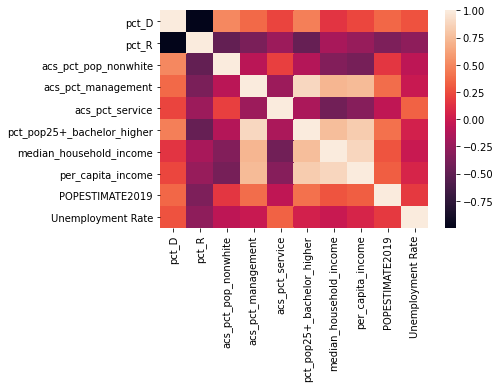

In [12]:
sns.heatmap(dats.corr());